In [5]:
from pandas import Series,DataFrame
import pandas as pd

#### 重新索引 pandas reindex方法

In [6]:
obj = Series([4.7,5.2,-7.1,2.0],index = ['c','d','a','b'])
print obj

c    4.7
d    5.2
a   -7.1
b    2.0
dtype: float64


In [8]:
#重新索引，不存在的就缺省
obj2 = obj.reindex(['a','b','c','d','e'])
print obj2

a   -7.1
b    2.0
c    4.7
d    5.2
e    NaN
dtype: float64


In [9]:
#缺省值为0
print obj.reindex(['a','b','c','d','e'], fill_value = 0)

a   -7.1
b    2.0
c    4.7
d    5.2
e    0.0
dtype: float64


In [11]:
#ffill实现前向值填充
obj3 = Series(['blue','purple','yellow'],index = [0,2,4])
print obj3
print obj3.reindex(range(6), method = 'ffill')

0      blue
2    purple
4    yellow
dtype: object
0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object


In [12]:
#bfill实现后项值填充
print obj3.reindex(range(6), method = 'bfill')

0      blue
1    purple
2    purple
3    yellow
4    yellow
5       NaN
dtype: object


In [13]:
import numpy as np

In [19]:
#DataFrame可以修改行和列索引，如果只传入一个序列，会重新索引行
frame = DataFrame(np.arange(9).reshape((3,3)), index = ['a', 'c', 'd'], columns=['Ohio', 'Texas', 'California'])
print frame
frame2 = frame.reindex(['a', 'b', 'c', 'd'])
print frame2

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8
   Ohio  Texas  California
a   0.0    1.0         2.0
b   NaN    NaN         NaN
c   3.0    4.0         5.0
d   6.0    7.0         8.0


In [16]:
#columns关键词重新索引列
state = ['Ohio', 'Utah', 'California']
print frame.reindex(columns = state)

   Ohio  Utah  California
a     0   NaN           2
c     3   NaN           5
d     6   NaN           8


In [37]:
#对行列进行重新索引  插值只能按行插
print frame
print frame.reindex(index=['a','b','c','d'] , columns= state)
print frame.reindex(index=['a','b','c','d'], method = 'bfill').reindex(columns= state)

# print frame.reindex( index=[1,2,3,4] , method = 'bfill', columns= state) 不懂为什么书上的这个例子报错？？？？

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8
   Ohio  Utah  California
a   0.0   NaN         2.0
b   NaN   NaN         NaN
c   3.0   NaN         5.0
d   6.0   NaN         8.0
   Ohio  Utah  California
a     0   NaN           2
b     3   NaN           5
c     3   NaN           5
d     6   NaN           8


In [41]:
#利用ix标签，重新索引
print frame
frame.ix[['a','c','e'], state]

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8


,Ohio,Utah,California
a,0.0,NaN,2.0
c,3.0,NaN,5.0
e,NaN,NaN,NaN


####  丢弃指定轴的项

In [44]:
#Series删除
obj = Series([1,2,3,4,5],index=['a','b','c','d','e'])
print obj
obj2 = obj.drop('a')
print obj2
print obj.drop(['c','d'])

a    1
b    2
c    3
d    4
e    5
dtype: int64
b    2
c    3
d    4
e    5
dtype: int64
a    1
b    2
e    5
dtype: int64


In [57]:
#DataFrame删除 axis = 1 按行的方向  axis = 0（默认） 按列的方向   
data = DataFrame(np.arange(16).reshape((4,4)),index = ['Ohio','Utah','California','NY'],columns=['one','two','three','four'])
print data
print data.drop(['Utah','California'])
print data.drop(['Utah','California'], axis = 0)
#对应的列标签沿着水平的方向依次删掉
print data.drop('two', axis=1)

            one  two  three  four
Ohio          0    1      2     3
Utah          4    5      6     7
California    8    9     10    11
NY           12   13     14    15
      one  two  three  four
Ohio    0    1      2     3
NY     12   13     14    15
      one  two  three  four
Ohio    0    1      2     3
NY     12   13     14    15
            one  three  four
Ohio          0      2     3
Utah          4      6     7
California    8     10    11
NY           12     14    15


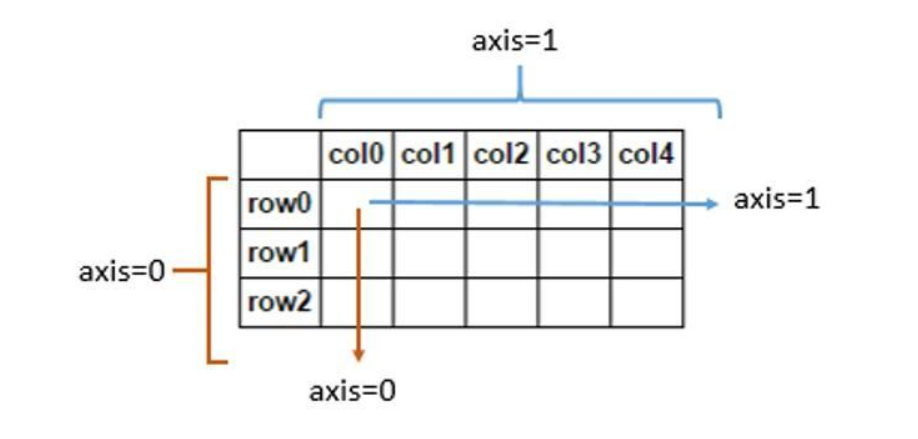

#### 索引选取和过滤

In [66]:
obj = Series(['aa','bb','cc','dd'],index = ['a','b','c','d'])
print obj
print obj['a']
print obj[2]
#不包括右边
print obj[1:3]
print obj[['b','d']]
print obj[[1,3]]
#包括右边
print obj['b':'d']
obj['b':'d'] = 5
print obj

a    aa
b    bb
c    cc
d    dd
dtype: object
aa
cc
b    bb
c    cc
dtype: object
b    bb
d    dd
dtype: object
b    bb
d    dd
dtype: object
b    bb
c    cc
d    dd
dtype: object
a    aa
b     5
c     5
d     5
dtype: object
